# Lab Segmentation 1

In [52]:
from commonfunctions import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, disk
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
## For all requirements: The quality of the results is evaluated.


# 1- Read the image 
# [VERY IMPORTANT] and convert it to float: image = image.astype(float)

# read image golf



# 2- Retreive the 3 channels of the image(R,G,B) (will be used in the coming steps)


# 3- Visually (not by code) detect the dominating color channel (C) for the backgroung (R, G or B)

# 4- Draw the dominating channel (r, g or b) thresholded by some threshold (to make sure your choice is meaningful)


# 5- Get an intuitive way(There is a very simple way) to make a mask that can get the pixels where the values of the dominating channels 
# have larger values than the other channels with an appropriate threshold

# 6- display the binarized image






In [3]:
# 1- Get the required RGB color (Using a color picker)


# 2- Read image

# 3- extract R, G and B channels (as float)

# 4- calculate differences FOR EACH CHANNEL (between the image and the required pixel value)

# 5- calculate overall distance from the given RGB color (use any appropriate distance measure, take care of the minus distances)

# 6-  create a mask by thresholding the differences

# 7- In the input image, Replace the pixels of the mask with the following color
# R = 230 , G = 90 , B=40

# 8- show the image or save it


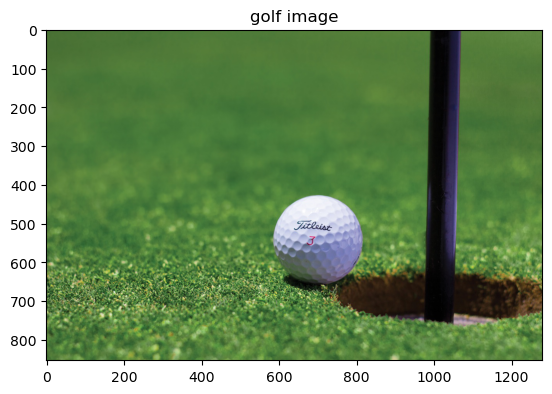

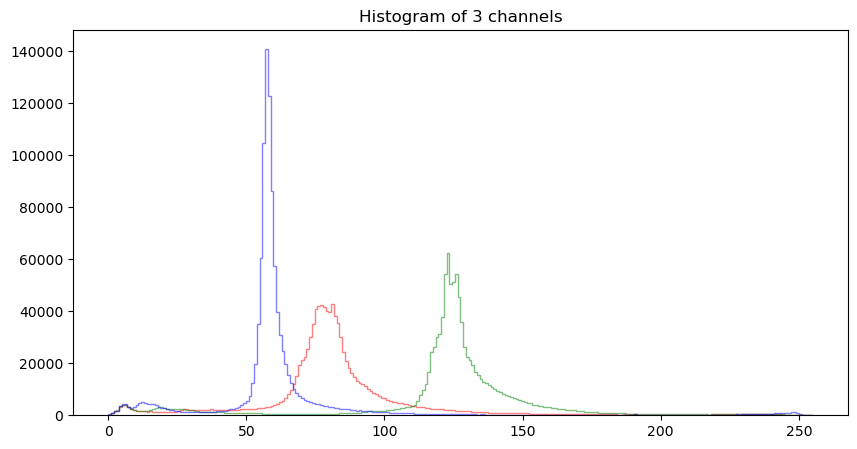

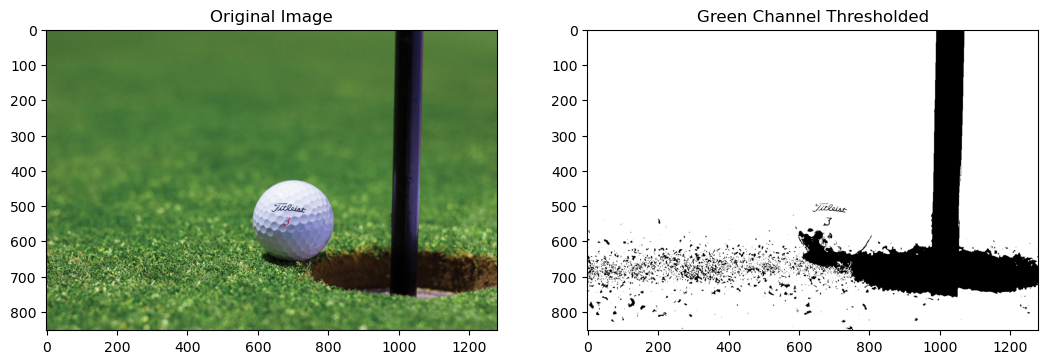

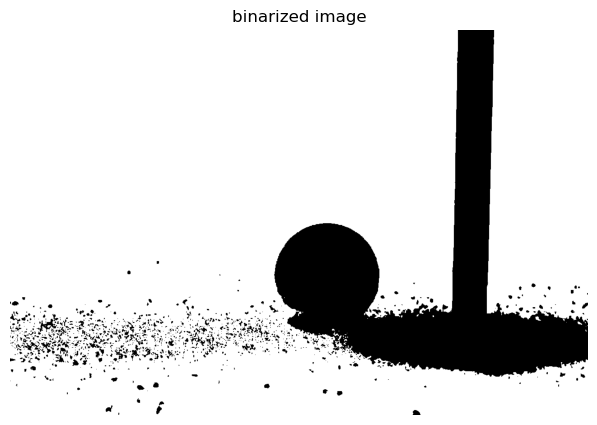

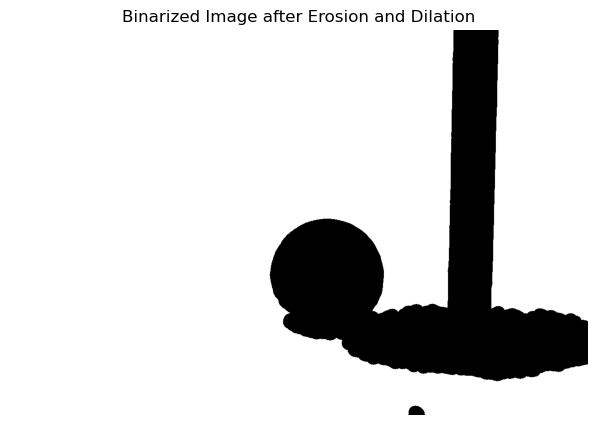

In [ ]:

golf_img_org = io.imread('imgs/exp1/golf.jpeg')
show_images([golf_img_org], ['golf image'])
golf_img = golf_img_org.astype(float)
#-----------------------------------------------------------------#
golf_img_r = golf_img[:,:,0]
golf_img_g = golf_img[:,:,1]
golf_img_b = golf_img[:,:,2]
#-----------------------------------------------------------------#
# Answer: visually by showing the original image the dominating color channel is the green channel
#----------------------------------------------------------------------------#
#-----------------------------------------------------------------------------------#
THRESHOLD = 100
golf_img_g_thresholded = golf_img_g > THRESHOLD
show_images([golf_img_org, golf_img_g_thresholded], ['Original Image', 'Green Channel Thresholded'])
#----------------------------------------------------------------------------------------------#
threshold=25
mask=(golf_img_g>golf_img_r+threshold)&(golf_img_g>golf_img_b+threshold)
#------------------------------------------------------------------------------------------------------#
plt.figure(figsize=(10,5)) # disk is se
plt.imshow(mask,cmap="gray")#binary
plt.title("binarized image")
plt.axis("off")
plt.show()
#---------------------------------------------------------------------------------------------------------#
dilation_mask = binary_dilation(mask, disk(5)) # disk is se
erosion_mask = binary_erosion(dilation_mask, disk(15))
plt.figure(figsize=(10, 5))
plt.imshow(erosion_mask, cmap='gray')
plt.title("Binarized Image after Erosion and Dilation")
plt.axis('off')
plt.show()


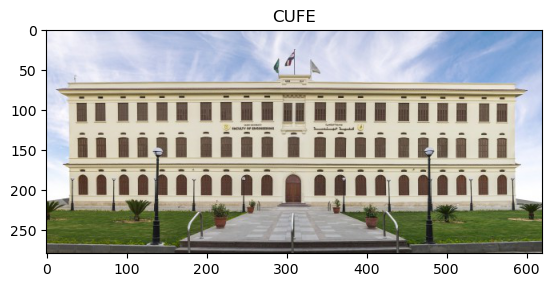

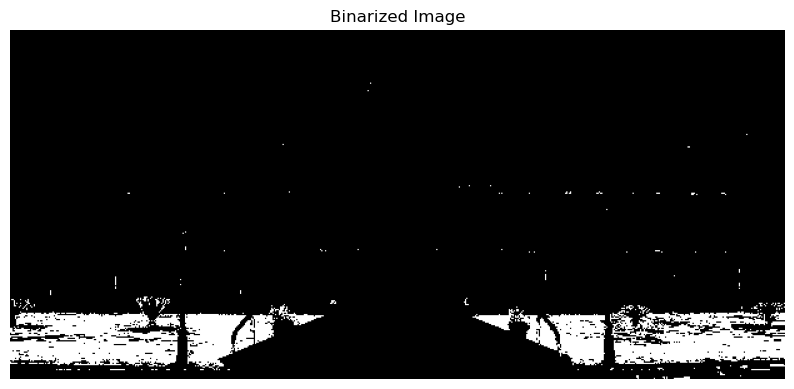

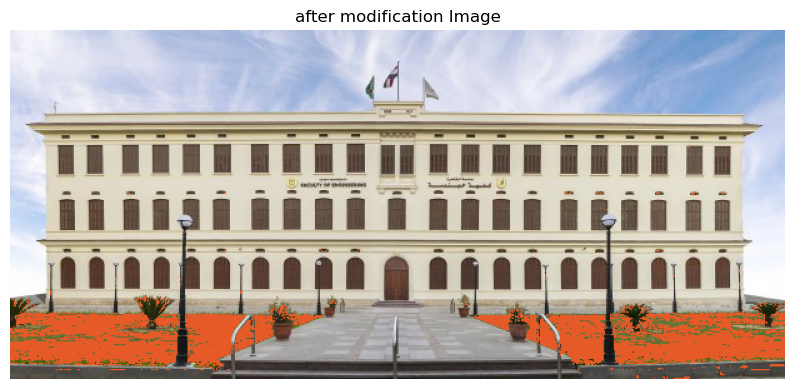

In [77]:

cufe_img_org = io.imread('imgs/exp2/cufe.png')
cufe_img = cufe_img_org.astype(float)
show_images([cufe_img_org], ['CUFE'])

cufe_img_r = cufe_img[:,:,0]
cufe_img_g = cufe_img[:,:,1]
cufe_img_b = cufe_img[:,:,2]

GRASS_COLOR = [50, 100, 40] #green
REQUIRED_COLOR = [230, 90, 40] #orange red

difference_r = cufe_img_r - GRASS_COLOR[0]
difference_g = cufe_img_g - GRASS_COLOR[1]
difference_b = cufe_img_b - GRASS_COLOR[2]

difference = np.sqrt(difference_r**2 + difference_g**2 + difference_b**2)

threshold = 42
mask = difference < threshold
plt.figure(figsize=(10, 5))
plt.imshow(mask, cmap='gray')
plt.title('Binarized Image')
plt.axis('off')
plt.show()
#------------------------------------------------------------------------------#
output = cufe_img.copy()
output[mask] = REQUIRED_COLOR
plt.figure(figsize=(10, 5))
plt.imshow(output.astype(np.uint8))
plt.title('after modification Image')
plt.axis('off')
plt.show()
